In [3]:
import sys
import os
script_dir = os.path.abspath(os.path.join('..', '..', 'numpy', '2D'))
sys.path.append(script_dir)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from model import *
from utils import *

In [5]:
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/2D/"

In [8]:
npc = 441
thresholds = [0.2, 0.25,0.3, 0.4, 0.5]
trials = np.linspace(0,50000, 101, dtype=int)
seeds = 5
grs = np.zeros([len(thresholds), len(trials), seeds])
for s in range(seeds):
    load_expt = f"/data/2D_obs_td_multi_0.0ns_012p_{npc}n_0.01plr_0.01clr_0.0001llr_0.0001alr_0.0001slr_uni_4a_{s}s_50000e_5rmax_0.1rsz"
    # load_expt = f"./data/2D_td_0.0ns_012p_64n_0.01plr_0.01clr_0.0001llr_0.0001alr_0.0001slr_uni_4a_{s}s_50000e_5rmax_0.1rsz"
    [logparams, all_rewards, allcoords] = saveload(data_dir+load_expt, 1, 'load')
    # goalcoord = np.array([0.5,0.5])
    goalcoord = np.array([0.75,-0.75])

    for t, trial in enumerate(trials):
        for e, threshold in enumerate(thresholds):
            grs[e,t,s] = np.sum(np.linalg.norm(goalcoord - logparams[trial][0],axis=1) < threshold)
        

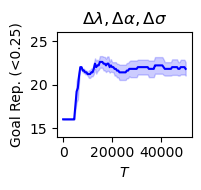

In [16]:
t_idx = 1
f,ax = plt.subplots(1,1,figsize=(2.25,2))

mgr = np.mean(grs[t_idx],axis=1)
cig = np.std(grs[t_idx],axis=1)/np.sqrt(seeds)
ax.plot(trials, mgr, color='b')
ax.fill_between(trials, mgr-cig, mgr+cig, alpha=0.2, color='b')
ax.set_xlabel(f'$T$')  # goal represntation Prop of cells
ax.set_ylabel(f'Goal Rep. (<{thresholds[t_idx]})')  # goal represntation Prop of cells
ax.set_title(r'$\Delta\lambda, \Delta\alpha,\Delta\sigma$')
ax.set_ylim([14,26])
# ax.set_xscale('log')
f.tight_layout()
# f.savefig(f'./svgs/2D_noobs_dyn_{npc}n.svg')

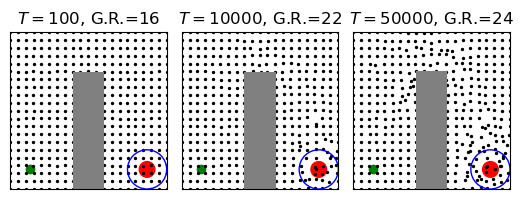

In [17]:
f,ax = plt.subplots(1,3,figsize=(2*2.65,2))
obscoords=[-0.2,0.2,-1,0.5]
for t,trial in enumerate([100,10000,50000]):
    x = logparams[trial][0][:,0]
    y = logparams[trial][0][:,1]
    circle = plt.Circle(xy=goalcoord, radius=0.1, color='r', fill=True)
    ax[t].add_patch(circle)
    ax[t].scatter(-0.75, -0.75, color='g')
    ax[t].scatter(x,y,color='k',s=2)
    circle = plt.Circle(xy=goalcoord, radius=thresholds[t_idx], color='b', fill=False)
    ax[t].add_patch(circle)

    gr = np.sum(np.linalg.norm(goalcoord - logparams[trial][0],axis=1) < thresholds[t_idx])

    ax[t].set_title(f'$T={trial}$, G.R.={gr}')
    ax[t].set_aspect('equal')
    ax[t].set_xlim([-1,1])
    ax[t].set_ylim([-1,1])
    ax[t].set_xticks([])
    ax[t].set_yticks([])

    from matplotlib.patches import Rectangle
    L = obscoords[0]
    T = obscoords[3]
    dfL = obscoords[1]-obscoords[0]
    dfT = obscoords[2]-obscoords[3]

    ax[t].add_patch(Rectangle((L,T), dfL, dfT, facecolor='grey'))  # top left

f.tight_layout()
# f.savefig(f'./svgs/2D_noobs_com_{npc}n.svg')